A Deeper Convolutional Neural Networks (CNNs)
=========
March 8, 2019.

Luis Da Silva.

This notebook implements a deeper CNN and explores the concept of data augmentation to classify the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.

Thanks to [Angelo Cangelosi](https://www.research.manchester.ac.uk/portal/angelo.cangelosi.html) for teaching me most of this material.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

### Data loading and processing

In [3]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = np_utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = np_utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### Two sample images

Sample input image: [[[1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 ...

 [[0.44313726 0.47058824 0.4392157 ]
  [0.43529412 0.4627451  0.43529412]
  [0.4117647  0.4392157  0.41568628]
  ...
  [0.28235295 0.31764707 0.3137255 ]
  [0.28235295 0.3137255  0.30980393]
  [0.28235295 0.3137255  0.30980393]]

 [[0.43529412 0.4627451  0.43137255]
  [0.40784314 0.4

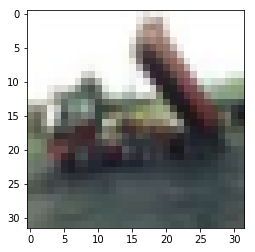

Sample input image: [[[0.10980392 0.09803922 0.03921569]
  [0.14509805 0.13333334 0.07450981]
  [0.14901961 0.13725491 0.07843138]
  ...
  [0.29803923 0.2627451  0.15294118]
  [0.31764707 0.28235295 0.16862746]
  [0.33333334 0.29803923 0.18431373]]

 [[0.12941177 0.10980392 0.05098039]
  [0.13333334 0.11764706 0.05490196]
  [0.1254902  0.10588235 0.04705882]
  ...
  [0.37254903 0.32156864 0.21568628]
  [0.3764706  0.32156864 0.21960784]
  [0.33333334 0.28235295 0.1764706 ]]

 [[0.15294118 0.1254902  0.05882353]
  [0.15686275 0.12941177 0.06666667]
  [0.22352941 0.19607843 0.12941177]
  ...
  [0.3647059  0.29803923 0.20392157]
  [0.41960785 0.34901962 0.25882354]
  [0.37254903 0.3019608  0.21176471]]

 ...

 [[0.3254902  0.28627452 0.20392157]
  [0.34117648 0.3019608  0.21960784]
  [0.32941177 0.2901961  0.20392157]
  ...
  [0.3882353  0.3647059  0.27450982]
  [0.3529412  0.32941177 0.23921569]
  [0.31764707 0.29411766 0.20392157]]

 [[0.34509805 0.28235295 0.2       ]
  [0.3529412  0.2

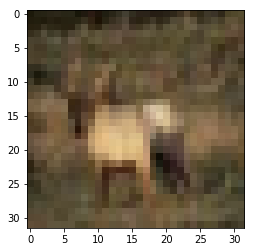

In [4]:
# visualisation of the numerical vector and 2D colour plot of the sample CIFAR imnage 2
Selected_Image = 2
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show() 

Selected_Image = 3
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show() 

### Simple CNN model

In [5]:
# network definition
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


In [6]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

In [7]:
# training
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, 
                    validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 15s 367us/step - loss: 1.7242 - acc: 0.3911 - val_loss: 1.3651 - val_acc: 0.5240
Epoch 2/20
40000/40000 [==============================] - 10s 249us/step - loss: 1.3705 - acc: 0.5159 - val_loss: 1.3086 - val_acc: 0.5391
Epoch 3/20
40000/40000 [==============================] - 10s 239us/step - loss: 1.2414 - acc: 0.5640 - val_loss: 1.1938 - val_acc: 0.5893
Epoch 4/20
40000/40000 [==============================] - 10s 238us/step - loss: 1.1549 - acc: 0.5955 - val_loss: 1.2227 - val_acc: 0.5743
Epoch 5/20
40000/40000 [==============================] - 10s 261us/step - loss: 1.0810 - acc: 0.6214 - val_loss: 1.0788 - val_acc: 0.6229
Epoch 6/20
40000/40000 [==============================] - 10s 250us/step - loss: 1.0316 - acc: 0.6401 - val_loss: 1.1387 - val_acc: 0.6079
Epoch 7/20
40000/40000 [==============================] - 10s 242us/step - loss: 0.9768 - acc: 0.6573 - val_loss: 1.

In [8]:
#save model in json format into a file
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)

#save the trained weights
model.save_weights('cifar10_weights.h5', overwrite=True)


**Analysis of the results**

10000/10000 [==============================] - 1s 101us/step

Test score/loss: 1.037604457950592
Test accuracy: 0.6741
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


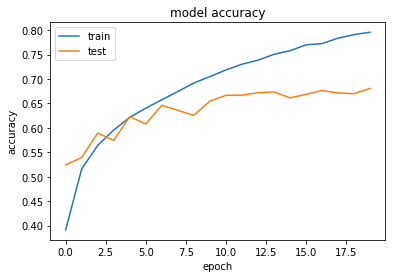

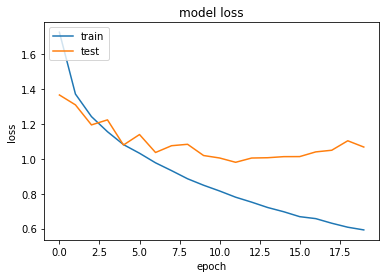

In [9]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# A deeper CNN
The following network will be used:

conv + conv + maxpool + dropout + conv + conv + maxpool + dense + dropout + dense

All the layers will use the reLu function, except the final one with the Softmax function necessary for the categorical classification 

In [10]:
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()

# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, 
                    validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if sys.path[0] == '':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
__________

**Analysis of the Deeper CNN results**

10000/10000 [==============================] - 1s 124us/step

Test score/loss: 0.7151409545898437
Test accuracy: 0.7806
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


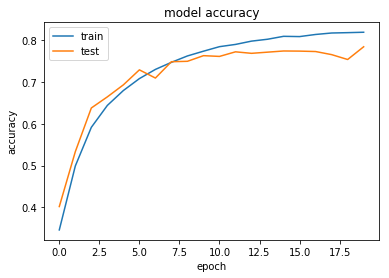

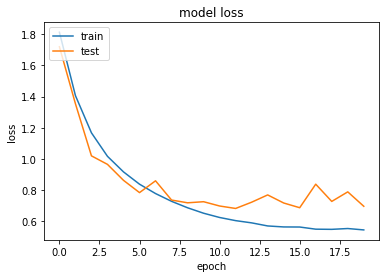

In [11]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Data Augmentation

In [12]:
# augumenting
print("Augmenting training set images...")
    
datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest')

#fit the dataset
datagen.fit(input_X_train)


Augmenting training set images...


__Training__

In [13]:
N_EPOCH = 20
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, 
                    validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 15s 364us/step - loss: 0.5351 - acc: 0.8240 - val_loss: 0.7982 - val_acc: 0.7801
Epoch 2/20
40000/40000 [==============================] - 14s 352us/step - loss: 0.5420 - acc: 0.8221 - val_loss: 0.7900 - val_acc: 0.7742
Epoch 3/20
40000/40000 [==============================] - 14s 356us/step - loss: 0.5504 - acc: 0.8214 - val_loss: 0.7191 - val_acc: 0.7834
Epoch 4/20
40000/40000 [==============================] - 14s 355us/step - loss: 0.5464 - acc: 0.8228 - val_loss: 1.1490 - val_acc: 0.7455
Epoch 5/20
40000/40000 [==============================] - 14s 354us/step - loss: 0.5451 - acc: 0.8225 - val_loss: 0.8016 - val_acc: 0.7754
Epoch 6/20
40000/40000 [==============================] - 14s 350us/step - loss: 0.5446 - acc: 0.8244 - val_loss: 0.8132 - val_acc: 0.7819
Epoch 7/20
40000/40000 [==============================] - 14s 355us/step - loss: 0.5392 - acc: 0.8239 - val_loss: 0.

**Analysis of the Data Augmented, Deeper CNN results**

10000/10000 [==============================] - 1s 140us/step

Test score/loss: 0.8627402393341065
Test accuracy: 0.7823
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


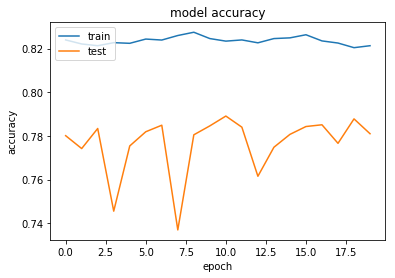

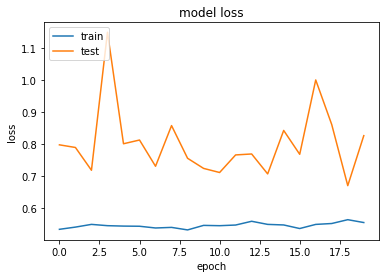

In [14]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## A different data augmentation approach

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(input_X_train)

In [16]:
N_EPOCH = 20
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, 
                    validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 14s 360us/step - loss: 0.5640 - acc: 0.8231 - val_loss: 0.8445 - val_acc: 0.7735
Epoch 2/20
40000/40000 [==============================] - 14s 361us/step - loss: 0.5578 - acc: 0.8230 - val_loss: 0.7165 - val_acc: 0.7684
Epoch 3/20
40000/40000 [==============================] - 15s 365us/step - loss: 0.5641 - acc: 0.8219 - val_loss: 0.7189 - val_acc: 0.7759
Epoch 4/20
40000/40000 [==============================] - 15s 366us/step - loss: 0.5730 - acc: 0.8184 - val_loss: 0.8625 - val_acc: 0.7303
Epoch 5/20
40000/40000 [==============================] - 15s 366us/step - loss: 0.5690 - acc: 0.8197 - val_loss: 0.7932 - val_acc: 0.7851
Epoch 6/20
40000/40000 [==============================] - 15s 363us/step - loss: 0.5758 - acc: 0.8187 - val_loss: 0.8102 - val_acc: 0.7651
Epoch 7/20
40000/40000 [==============================] - 14s 360us/step - loss: 0.5752 - acc: 0.8190 - val_loss: 0.

**Analysis**

10000/10000 [==============================] - 1s 139us/step

Test score/loss: 1.0270602275848388
Test accuracy: 0.7723
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


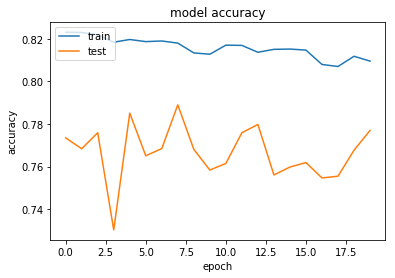

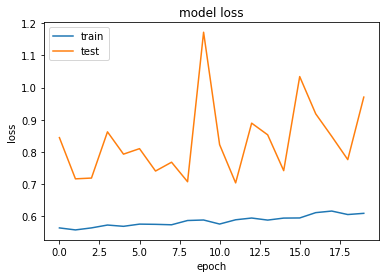

In [17]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()